### MBD-EN OCT20 - IE School of Human Scienses & Technology

# STATISTICAL PROGRAMMING - PYTHON

### Individual Assignment - Titanic dataset

Author: Pedro Lourenço dos Santos

Date: 06/02/2021

# Summary

The goal of this assignment is to perform an exploratory analysis of the Titanic dataset ( https://www.kaggle.com/c/titanic/data) and implement a strategy to impute missing values. The notebook is divided in the following steps:

### Part 1: Exploratory Analysis

1. Reading the dataset and initial analysis


2. a) Percentage of survivors out of total number of passengers

   b) Percentage of men and women out of total number of passengers


3. a) Percentage of survivors by sex

   b) Sex distribution of survivors


4. Probability of being male/female and surviving/not surviving


5. Probability of survival/not survival of all combinations of sex and class


### Part 2: Imputing Missing Values

6. Strategy to impute the missing values in the Age column.

   a) Overview of Age column

   b) Correlation analysis (numerical variables)

   c) Categorical variables analysis
   
   d) Title variable creation from Name column
   
   e) Combination of Title and Pclass
   
   f) Filling missing values in Age column
   
   g) Conclusion

## Part I: Exploratory Analysis

Exploratory data analysisis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often employing data visualization methods.

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Point 1. Reading the dataset using pandas, using PassengerId column as index

In the next cell I read the dataset using pandas library, using "PassengerId" column as index. "PassengerId" is an appropriate column as index because it is a key column (identifying each observation with a different value for every row).

In [2]:
df = pd.read_csv("train.csv",index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Data Dictionary (available at https://www.kaggle.com/c/titanic/data)

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) 

Name: Passenger Namme

Sex: Male or Female

Age: Age in years

SibSp: Number of siblings / spouses aboard the Titanic

Parch: Number of parents / children aboard the Titanic	

Ticket: Ticket number	

Fare: Passenger fare

Cabin: Cabin number	

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### After the above dictionary explaining each column, I will do an overview with 2 summary tables below with the following main conclusions:

- There are a total of 891 passengers (rows) in the dataset and 11 different variables (columns).


- Variable Types: 

Discrete Numeric: SibSp (int64), Parch (int64) 

Continuous Numeric: Fare (float64) and Age (float64). Age values in this dataset have decimals below 1, usually Age is considered a discrete numeric variable instead of continuous

Alphanumeric: Ticket (object), Cabin (object)

Categorical: Survived (int64), Pclass (int64), Sex (object), Embarked (object)

- There are missing/null values in variables Age, Cabin and Embarked (addressed in Part 2)

In [3]:
df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Taylor, Mr. Elmer Zebley",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Point 2. a) The Percentage of survivors out of total number of passengers is approximately 38.38%.

First I changed the column "Survived" values according to the Dictionary for clearer interpretation. Then created a table counting the values and percentage of survivors out of total number of passengers. Finally added a visual representation.

          Counts  Percentage (%)
Died         549           61.62
Survived     342           38.38


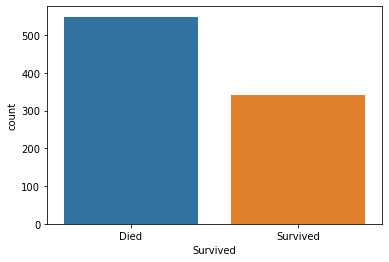

In [4]:
df["Survived"].replace({0: "Died", 1: "Survived"}, inplace=True)

count = df.Survived.value_counts(dropna=False)
pct = df.Survived.value_counts(dropna=False, normalize=True)
print(pd.concat([count,round(pct * 100, 2)], axis=1, keys=['Counts', 'Percentage (%)']))

sns.countplot(x="Survived", data=df)

### Point 2. b) The Percentage of men and women out of total number of passengers is approximately 64.76% and 35.24% respectively.

From the below table we can see the count and percentage of men and women out of total number of passengers. I also added a visual representation.

        Counts  Percentage (%)
male       577           64.76
female     314           35.24


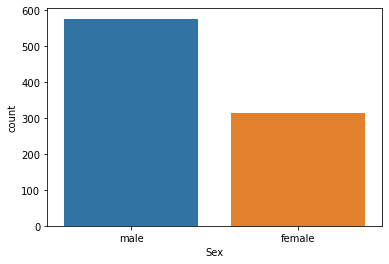

In [5]:
count = df.Sex.value_counts(dropna=False)
pct = df.Sex.value_counts(dropna=False, normalize=True)
print(pd.concat([count,round(pct * 100, 2)], axis=1, keys=['Counts', 'Percentage (%)']))

sns.countplot(x="Sex", data=df)

### Point 3. a) The Percentage of survivors of female passengers that survived is approximately 74.20% and the percentage of male passengers that survived is approximately 18.89%.

In [6]:
summary = df.groupby(["Sex", "Survived"]).size().unstack("Survived")
summary["Survival Percentage"] = round(summary["Survived"]/(summary["Died"]+summary["Survived"])*100,2)
summary

Survived,Died,Survived,Survival Percentage
Sex,,,
female,81,233,74.20
male,468,109,18.89


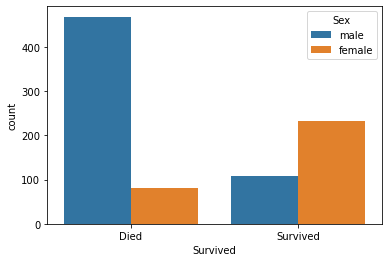

In [7]:
sns.countplot(df['Survived'], hue = df['Sex'])

### Point 3. b) The Percentage of survivors that were men and women is approximately 31.87% and 68.13% respectively.

In [8]:
summary_b = summary["Survived"]
summary_b["total"] = summary_b["female"]+summary_b["male"]
summary_b = pd.DataFrame(summary_b)
summary_b["Sex Distribution"] = round(summary_b["Survived"]/summary_b.iloc[2, 0]*100,2)
summary_b

<ipython-input-8-02c693fd5cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_b["total"] = summary_b["female"]+summary_b["male"]


,Survived,Sex Distribution
Sex,,
female,233,68.13
male,109,31.87
total,342,100.00


### Point 4. Probability of being male/female and surviving/not surviving

In [9]:
summary3 = df.groupby(["Sex", "Survived"]).size().unstack("Survived")
summary3 = round(summary3/df["Survived"].count()*100,2)
summary3

Survived,Died,Survived
Sex,,
female,9.09,26.15
male,52.53,12.23


### Point 5. Probability of survival/not survival of all combinations of sex and class

In [10]:
summary4 = df.groupby(["Sex","Pclass", "Survived"]).size().unstack("Survived")
summary4 = round(summary4/df["Survived"].count()*100,2)
summary4

Survived        Died  Survived
Sex    Pclass                 
female 1        0.34     10.21
       2        0.67      7.86
       3        8.08      8.08
male   1        8.64      5.05
       2       10.21      1.91
       3       33.67      5.27

## Part II: Imputing Missing Values

One basic employment of EDA is to find the best possible way to impute missing values. Below calculation show the 3 columns with misssing variables in this dataset. In the next point I will focus on a strategy to fill the 177 missing values in the Age column, which represent around 20% of the total 891 rows present in the dataset.

In [11]:
df.isnull().sum().sort_values(ascending = False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

### Point 6. Strategy to impute the missing values in the Age column.

### a) Overview of Age column

In order to decide how to input the missing values in the Age column, I started by looking at a description of the Age variable and then I proceeded  with an analysis how the other variables impacted the Age values.

In [115]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

One possible strategy would be to fill all the missing Age values with the median Age (28). This is too simple and it is a strategy which is not benefiting from all the information available. Thererefore my goal is to extract the maximum relevant information from all variables and fill the missing Age values with different values which would be more plausible in accordance with the information available. 

### b) Correlation analysis (numerical variables)

My first step was to perform a correlation analysis to check which variables correlate more with the Age variable, but as can be seen below only numeric variables are taken into consideration in the correlation analysis. Age variable correlates more with Pclass (-37%), followed by SibSp (-31%), Parch (-19%) and finally Fare with only 10%. Fare can be excluded not only for its low correlation with Age, but also its high correlation with Pclass which seems to be a variable I could take into consideration to inpute missing values in Age column.

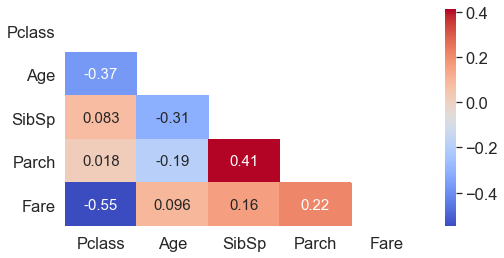

In [95]:
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.5)
sns.set_style('white')

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # Generating a mask for the upper triangle
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask, annot_kws={'size':15})
plt.show()

### c) Categorical variables analysis

Next step was to look at the categorical variables and analyse its relation with the Age column. If the categorical variables have a low number of categories, which corresponds to a low number of unique values, the relation with Age column can be easily observed in a graph or in a table. Survived, Sex and Embarked are the categorical variables with less categories as can be seen below.

In [98]:
df.select_dtypes(exclude=np.number).nunique().sort_values(ascending = True)

Survived      2
Sex           2
Embarked      3
Title        17
Cabin       147
Ticket      681
Name        891
dtype: int64

For the 3 numerical variables previously mentioned and since they only have few unique values also, we will analyze them together with the 3 categorical variables.

In [101]:
df.select_dtypes(include=np.number).nunique().sort_values(ascending = True)

Pclass      3
SibSp       7
Parch       7
Age        88
Fare      248
dtype: int64

The next visualization has 6 box plots, 1 for each variable relating with Age variable. We can see Pclass, SibSp and Parch show interesting variations in Age, while Survived, Sex and Embarked show similar Age variations among their different categories. 

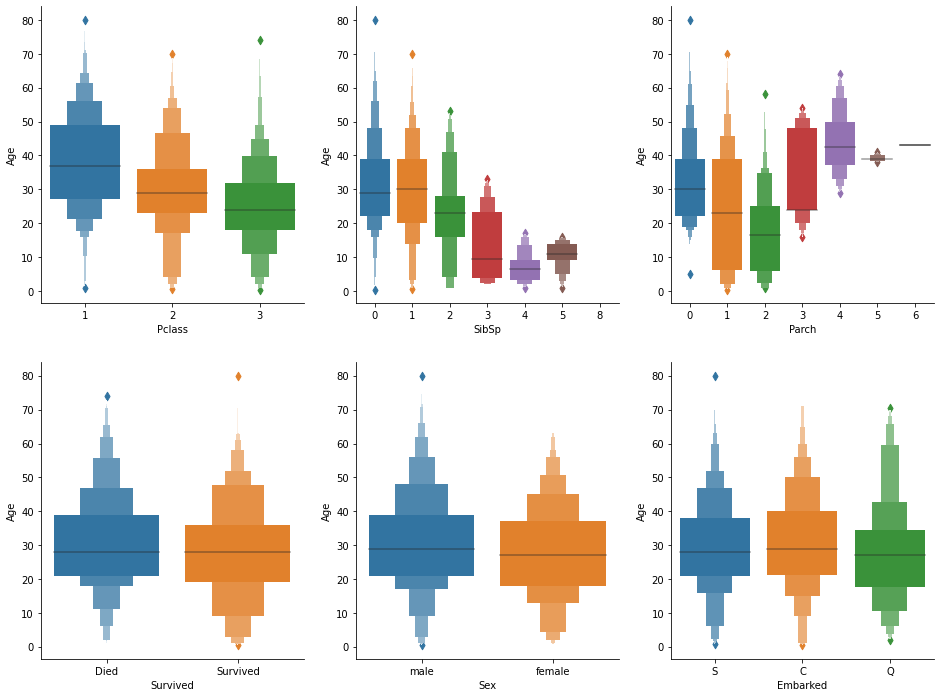

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(16, 12))

sns.boxenplot(data=df, x='Pclass', y='Age', dodge=True, ax=ax[0, 0])
sns.boxenplot(data=df, x='SibSp', y='Age', dodge=True, ax=ax[0, 1])
sns.boxenplot(data=df, x='Parch', y='Age', dodge=True, ax=ax[0, 2])
sns.boxenplot(data=df, x='Survived', y='Age', dodge=True, ax=ax[1, 0])
sns.boxenplot(data=df, x='Sex', y='Age', dodge=True, ax=ax[1, 1])
sns.boxenplot(data=df, x='Embarked', y='Age', dodge=True, ax=ax[1, 2])

sns.despine()
plt.show()

### d) Title variable creation from Name column

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the remaining categorical variables not analysed, Cabin and Ticket besides being alphanumerical values with many different categores, theoretically they do not appear to be related with Age. However, regarding the Name column, we can see in the first 5 rows of the dataset below that it contain a Title after the surname separated between a comma and a dot (for example Mr., Mrs, Miss., etc). I believe this information can give insights about the Age of the passenger, so I extracted these Titles to a new column as can be seen below.

In [13]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


To validate this new column, I check below the relation between the Title column and Sex column. The results seem correct, since it makes sense to have Master and Mr as the most represented Male Titles and Miss and Mrs as the most represented Female Titles. Also it makes sense that the median Age of Master is younger than Mr, and the median Age of Miss is younger than Mrs.

In [14]:
df.groupby(['Title','Sex'])['Age'].agg(["size", "median"])

size  median
Title    Sex                 
Capt     male       1    70.0
Col      male       2    58.0
Countess female     1    33.0
Don      male       1    40.0
Dr       female     1    49.0
         male       6    44.0
Jonkheer male       1    38.0
Lady     female     1    48.0
Major    male       2    48.5
Master   male      40     3.5
Miss     female   182    21.0
Mlle     female     2    24.0
Mme      female     1    24.0
Mr       male     517    30.0
Mrs      female   125    35.0
Ms       female     1    28.0
Rev      male       6    46.5
Sir      male       1    49.0

Although there are many different Title categories, the only important ones to analyse right now are the ones corresponding to missing values in columns Age as can be seen below.

In [15]:
df[df['Age'].isna()].groupby(['Title','Sex'])['Age'].agg(["size", "median"])

,,size,median
Title,Sex,,
Dr,male,1,NaN
Master,male,4,NaN
Miss,female,36,NaN
Mr,male,119,NaN
Mrs,female,17,NaN


One possible solution would be to fill in the 177 missing Age values with the Median value of its Title Category. From the previous longer table (the one showing the median for all passengers), Master with median of 3.5 years, Miss with median of 21 years, Mrs with median of 35 years show a good improvement/difference from the general median of 28 years, however all passengers with Title Mr, which is the most represented Title with 119 missing values, would have a median of 30 years, which is similar to the general median, and I believe it can still be improved/differentiated by combining information from the previous significant variables affecting Age which were Pclass, SibSp and Parch.

### e) Combination of Title and Pclass

In the table below, which is combining Title with Pclass, it can be seen together with the already gathered information for Title, additional diferences due to the inclusion of Pclass. The median Age tends to be higher in Pclass 1 (wealthier passengers tend to be older) and lower in Pclass 3 as it was already seen in a previous visualization.

In [16]:
df.loc[df['Title'].isin(["Dr", "Master", "Miss", "Mr", "Mrs"])].groupby(["Title", "Pclass"])[["Age"]].median()

Age
Title  Pclass      
Dr     1       46.5
       2       38.5
Master 1        4.0
       2        1.0
       3        4.0
Miss   1       30.0
       2       24.0
       3       18.0
Mr     1       40.0
       2       31.0
       3       26.0
Mrs    1       41.5
       2       32.0
       3       31.0

Note: I could have added Parch and SibSp in the aggregation, however I think it would be too complex for a fill missing values strategy. Similar to prediction problems where overfitting can be a problem, I think having the differentation above is already enough to fill the missing values in the Age column and having a matrix with too much different values to input in the Age column would be an unnecessary level of detail (also taking into consideration the total number of passengers of this dataset that is not so big).

### f) Filling missing values in Age column

Finally with the below function we fill the missing values in Age column with the median Age values shown in the previous table (groupby).

In [33]:
df['Age'] = df['Age'].fillna(df.groupby(["Title", "Pclass"])['Age'].transform('median'))

In [35]:
print("Missing Values in Age: ", df['Age'].isnull().sum())

df['Age'].describe()

Missing Values in Age:  0
Age Median:  26.0


count    891.000000
mean      29.146655
std       13.499426
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

### g) Conclusion

Age column has now 0 missing values. Although there was a small decrease in the mean and median of the Age column, the rational behind the strategy to fill missing values was good and the distribution of the values filled in the Age column was consistent with the Title (present in Name Column) and Pclass distribution of the remaining passengers.